In [1]:
#Import libs
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('messages.csv')
train.head()

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0


In [3]:
print ('Shape = >',train.shape)

Shape = > (2893, 3)


In [4]:
train.isnull().sum()

subject    62
message     0
label       0
dtype: int64

In [5]:
train.dtypes

subject    object
message    object
label       int64
dtype: object

# EDA(Exploratory Data Analysis)

In [7]:
print ('spam and ham','\n',train.label.value_counts())

spam and ham 
 0    2412
1     481
Name: label, dtype: int64


In [8]:
#Ratio
print ('spam ratio = ', round(len(train[train['label']== 1]) / len(train.label),2)*100,'%')
print ('ham ratio  = ', round(len(train[train['label']== 0]) / len(train.label),2)*100,'%')

spam ratio =  17.0 %
ham ratio  =  83.0 %


In [9]:
#New column for Length of message
train['length'] = train.message.str.len()
train.head()

,subject,message,label,length
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,2856
1,NaN,"lang classification grimes , joseph e . and ba...",0,1800
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,1435
3,risk,a colleague and i are researching the differin...,0,324
4,request book information,earlier this morning i was on the phone with a...,0,1046


## Data cleaning

In [10]:
# Convert all messages to lower case
train['message'] = train['message'].str.lower()

In [11]:
# Replace email addresses with 'email'
train['message'] = train['message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
train['message'] = train['message'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
train['message'] = train['message'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
train['message'] = train['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')

    
# Replace numbers with 'numbr'
train['message'] = train['message'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [12]:
# Remove punctuation
train['message'] = train['message'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
train['message'] = train['message'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
train['message'] = train['message'].str.replace(r'^\s+|\s+?$', '')

In [13]:
train.drop(columns=['subject'],axis=1,inplace=True)

In [14]:
train.head()

,message,label,length
0,content length numbr apple iss research center...,0,2856
1,lang classification grimes joseph e and barbar...,0,1800
2,i am posting this inquiry for sergei atamas sa...,0,1435
3,a colleague and i are researching the differin...,0,324
4,earlier this morning i was on the phone with a...,0,1046


In [15]:
# Remove stopwords
import string
import nltk
from nltk.corpus import  stopwords

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

train['message'] = train['message'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

In [16]:
# New column (clean_length) after puncuations,stopwords removal
train['clean_length'] = train.message.str.len()
train.head()

,message,label,length,clean_length
0,content length numbr apple iss research center...,0,2856,2179
1,lang classification grimes joseph e barbara f ...,0,1800,1454
2,posting inquiry sergei atamas satamas umabnet ...,0,1435,1064
3,colleague researching differing degrees risk p...,0,324,210
4,earlier morning phone friend mine living south...,0,1046,629


In [17]:
# Total length removal
print ('Original Length', train.length.sum())
print ('Clean Length', train.clean_length.sum())

Original Length 9344743
Clean Length 6767857


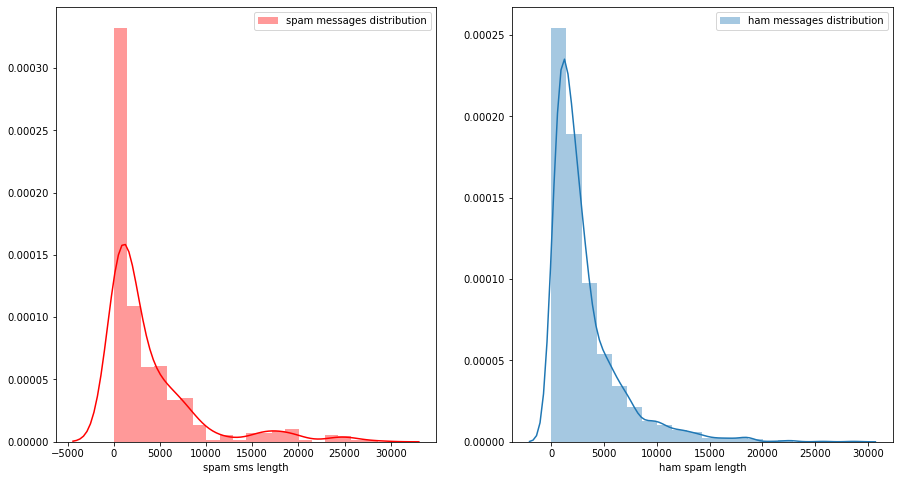

In [19]:
# Message distribution BEFORE cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(train[train['label']==1]['length'],bins=20,ax=ax[0],label='spam messages distribution',color='r')

ax[0].set_xlabel('spam sms length')
ax[0].legend()

sns.distplot(train[train['label']==0]['length'],bins=20,ax=ax[1],label='ham messages distribution')
ax[1].set_xlabel('ham spam length')
ax[1].legend()

plt.show()

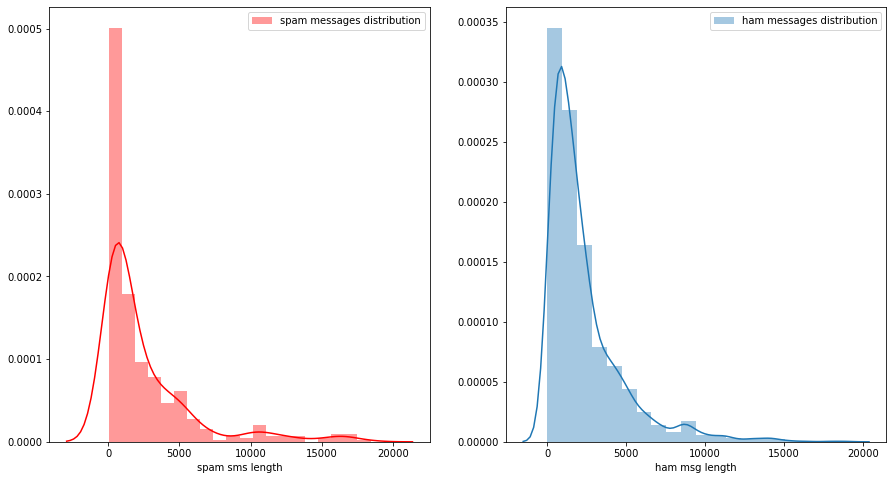

In [20]:
# Message distribution AFTER cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(train[train['label']==1]['clean_length'],bins=20,ax=ax[0],label='spam messages distribution',color='r')
ax[0].set_xlabel('spam sms length')
ax[0].legend()

sns.distplot(train[train['label']==0]['clean_length'],bins=20,ax=ax[1],label='ham messages distribution')
ax[1].set_xlabel('ham msg length')
ax[1].legend()

plt.show()

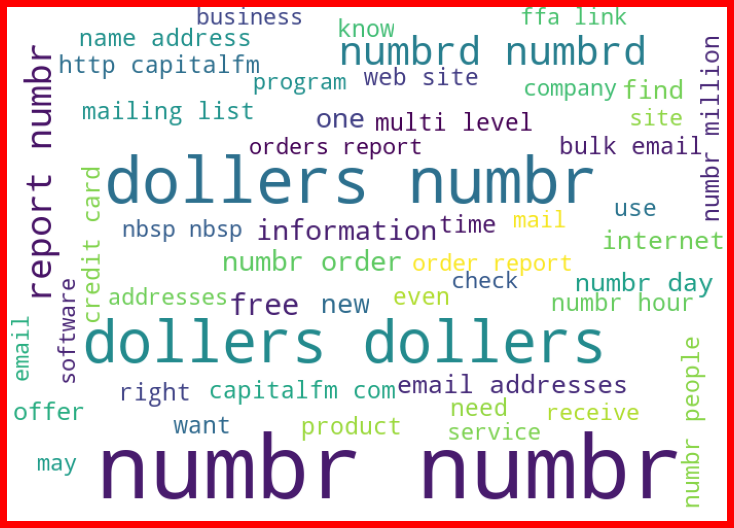

In [21]:
#Getting sense of loud words in not happy 
from wordcloud import WordCloud


spam = train['message'][train['label']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(spam))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

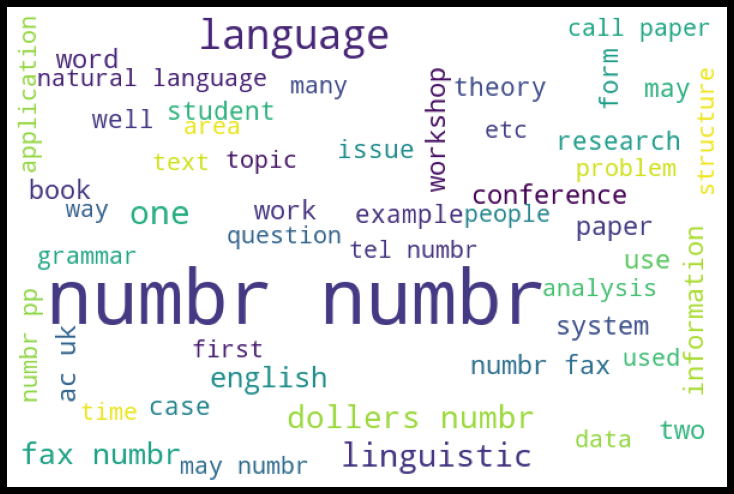

In [22]:
#Getting sense of loud words in happy 

ham = train['message'][train['label']==0]
ham_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(ham))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(ham_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Different Model Building(train test split)

In [23]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.multiclass import OneVsRestClassifier

In [24]:
# 1. Convert text into vectors using TF-IDF
# 2. Instantiate MultinomialNB classifier
# 3. Split feature and label
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

tf_vec = TfidfVectorizer()

naive = MultinomialNB()

features = tf_vec.fit_transform(train['message'])
X = features
y = train['label']

In [25]:
X.shape

(2893, 54998)

In [26]:
# Train and predict
X_train,x_test,Y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

### 1. Gaussian Navies bayes

In [27]:
naive.fit(X_train,Y_train)

y_pred= naive.predict(x_test)

print ('Final score = > ', accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

Final score = >  0.8255613126079447
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       464
           1       1.00      0.12      0.22       115

    accuracy                           0.83       579
   macro avg       0.91      0.56      0.56       579
weighted avg       0.86      0.83      0.77       579



### 2. LogisticRegression

In [28]:
lr = LogisticRegression()
ovr = OneVsRestClassifier(lr)
ovr.fit(X_train,Y_train)
y_pred= ovr.predict(x_test)
print ('Final score = > ', accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

Final score = >  0.9516407599309153
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       464
           1       0.99      0.77      0.86       115

    accuracy                           0.95       579
   macro avg       0.97      0.88      0.92       579
weighted avg       0.95      0.95      0.95       579



### 3. SVC(Support Vector Machine)

In [29]:
svm = LinearSVC()
svm.fit(X_train,Y_train)
y_pred= svm.predict(x_test)
print ('Final score = > ', accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

Final score = >  0.9861830742659758
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       464
           1       0.99      0.94      0.96       115

    accuracy                           0.99       579
   macro avg       0.99      0.97      0.98       579
weighted avg       0.99      0.99      0.99       579



### 4. VotingClassifier

In [30]:
estimators = [ ('svm',svm) , ('ovr' , ovr) ]
clf = VotingClassifier(estimators , voting='hard')
clf.fit(X_train,Y_train)
y_pred= clf.predict(x_test)
print ('Final score = > ', accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

Final score = >  0.9516407599309153
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       464
           1       0.99      0.77      0.86       115

    accuracy                           0.95       579
   macro avg       0.97      0.88      0.92       579
weighted avg       0.95      0.95      0.95       579



#### Apply 4 different models and out of all SVC(support vector machine) model is getting highest accuracy almost 95%.